In [3]:
import finlab
#from opencc import OpenCC
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import time
import numpy as np
import statsmodels.api as sm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from googletrans import Translator
import pickle
import requests
from bs4 import BeautifulSoup
import time
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
#from deep_translator import GoogleTranslator
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as EN_STOP_WORDS
from spacy.lang.zh.stop_words import STOP_WORDS as ZH_STOP_WORDS
from string import punctuation
from heapq import nlargest
#from multiprocess import Pool, cpu_count

## 資料準備

In [1]:
TW = yf.download('^TWII')
#news_title = finlab.data.get('tw_news_cnyes')
#date = [x.strftime('%Y-%m-%d') for x in np.unique(news_title.index.date)]


KeyboardInterrupt



In [4]:
## 爬完的盤前分析新聞

ALL_ARTICLE_CONTENT = pd.read_pickle('ALL_ARTICLE_CONTENT')

In [159]:
## 利用平行運算將盤前分析新聞翻譯成英文

def translate_article(article_key, ENGLISH_NEWS):
    print(f"Translating {article_key}...")
    translator = GoogleTranslator(source='auto', target='en')
    English_article = []
    for r in range(len(ALL_ARTICLE_CONTENT[article_key])):
        translated_text = translator.translate(ALL_ARTICLE_CONTENT[article_key][r])
        English_article.append(translated_text)
    print(f"Finished translating {article_key}")
    ENGLISH_NEWS[article_key] = English_article

# 使用字典存儲翻譯結果
ENGLISH_NEWS = {}

# 使用 ThreadPoolExecutor 並行執行翻譯任務
with ThreadPoolExecutor(max_workers=10) as executor:
    # 提交所有翻譯任務，並傳遞 ENGLISH_NEWS 字典
    futures = [executor.submit(translate_article, key, ENGLISH_NEWS) for key in ALL_ARTICLE_CONTENT.keys()]

    # 等待所有任務完成
    for future in as_completed(futures):
        future.result()  # 處理結果，確保任務完成

# 打印翻譯結果
for key, translation in ENGLISH_NEWS.items():
    print(f"{key}: {translation}")


Translating 2013-01-02...
Translating 2013-01-03...
Translating 2013-01-04...
Translating 2013-01-05...
Finished translating 2013-01-05
Translating 2013-01-06...
Finished translating 2013-01-06
Translating 2013-01-07...
Translating 2013-01-08...
Translating 2013-01-09...
Translating 2013-01-10...
Translating 2013-01-11...
Translating 2013-01-14...
Translating 2013-01-15...
Finished translating 2013-01-02
Translating 2013-01-16...
Finished translating 2013-01-10
Translating 2013-01-17...
Finished translating 2013-01-11
Translating 2013-01-18...
Finished translating 2013-01-07
Translating 2013-01-21...
Finished translating 2013-01-14
Translating 2013-01-22...
Finished translating 2013-01-09
Translating 2013-01-23...
Finished translating 2013-01-03
Translating 2013-01-24...
Finished translating 2013-01-08
Translating 2013-01-25...
Finished translating 2013-01-15
Translating 2013-01-28...
Finished translating 2013-01-04
Translating 2013-01-29...
Finished translating 2013-01-25
Translating 

Finished translating 2013-07-25Finished translating 2013-07-26
Translating 2013-08-08...

Translating 2013-08-09...
Finished translating 2013-07-30
Translating 2013-08-12...
Finished translating 2013-08-01
Translating 2013-08-13...
Finished translating 2013-07-29
Translating 2013-08-14...
Finished translating 2013-07-31
Translating 2013-08-15...
Finished translating 2013-08-05
Translating 2013-08-16...
Finished translating 2013-08-07
Translating 2013-08-17...
Finished translating 2013-08-17
Translating 2013-08-19...
Finished translating 2013-08-06
Translating 2013-08-20...
Finished translating 2013-08-08
Translating 2013-08-21...
Finished translating 2013-08-21
Translating 2013-08-22...
Finished translating 2013-08-09
Translating 2013-08-23...
Finished translating 2013-08-13
Translating 2013-08-26...
Finished translating 2013-08-02
Translating 2013-08-27...
Finished translating 2013-08-12
Translating 2013-08-28...
Finished translating 2013-08-14
Translating 2013-08-29...
Finished trans

Finished translating 2014-02-13
Translating 2014-02-25...
Finished translating 2014-02-11
Translating 2014-02-26...
Translating 2014-02-27...
Finished translating 2014-02-27
Translating 2014-03-01...
Finished translating 2014-03-01
Translating 2014-03-02...
Finished translating 2014-03-02
Translating 2014-03-03...
Translating 2014-03-04...
Finished translating 2014-02-14
Translating 2014-03-05...
Finished translating 2014-02-19
Translating 2014-03-06...
Finished translating 2014-02-17
Translating 2014-03-07...
Finished translating 2014-02-18
Translating 2014-03-10...
Finished translating 2014-02-20
Translating 2014-03-11...
Finished translating 2014-02-21
Translating 2014-03-12...
Finished translating 2014-03-05
Translating 2014-03-13...
Finished translating 2014-02-26
Translating 2014-03-14...
Finished translating 2014-03-03
Translating 2014-03-17...
Finished translating 2014-03-10
Translating 2014-03-18...
Finished translating 2014-03-04
Translating 2014-03-19...
Finished translating

Finished translating 2014-08-27
Translating 2014-09-11...
Finished translating 2014-08-29
Translating 2014-09-12...
Finished translating 2014-08-25
Translating 2014-09-15...
Finished translating 2014-09-01
Translating 2014-09-16...
Finished translating 2014-09-04
Translating 2014-09-17...
Finished translating 2014-09-03
Translating 2014-09-18...
Finished translating 2014-09-09
Translating 2014-09-19...
Finished translating 2014-09-05
Translating 2014-09-20...
Finished translating 2014-09-20
Translating 2014-09-22...
Finished translating 2014-09-11Finished translating 2014-09-10
Translating 2014-09-23...

Translating 2014-09-24...
Finished translating 2014-09-12
Translating 2014-09-25...
Finished translating 2014-09-18
Translating 2014-09-26...
Finished translating 2014-09-15
Translating 2014-09-29...
Finished translating 2014-09-16
Translating 2014-09-30...
Finished translating 2014-09-19
Translating 2014-10-01...
Finished translating 2014-09-24
Translating 2014-10-02...
Finished trans

Finished translating 2015-03-06
Translating 2015-03-23...
Finished translating 2015-03-11
Translating 2015-03-24...
Finished translating 2015-03-10
Translating 2015-03-25...
Finished translating 2015-03-16
Translating 2015-03-26...
Finished translating 2015-03-12
Translating 2015-03-27...
Finished translating 2015-03-13
Translating 2015-03-29...
Finished translating 2015-03-29
Translating 2015-03-30...
Translating 2015-03-31...
Finished translating 2015-03-17
Translating 2015-04-01...
Finished translating 2015-03-20
Translating 2015-04-02...
Finished translating 2015-03-23
Translating 2015-04-07...
Translating 2015-04-08...
Finished translating 2015-03-19
Translating 2015-04-09...
Translating 2015-04-10...
Finished translating 2015-03-18
Translating 2015-04-13...
Finished translating 2015-03-24
Translating 2015-04-14...
Finished translating 2015-03-26
Translating 2015-04-15...
Finished translating 2015-03-27
Translating 2015-04-16...
Finished translating 2015-03-30
Translating 2015-04-

Finished translating 2015-09-18
Translating 2015-10-04...
Finished translating 2015-10-04
Translating 2015-10-05...
Finished translating 2015-09-21
Translating 2015-10-06...
Finished translating 2015-09-22
Translating 2015-10-07...
Finished translating 2015-09-17
Translating 2015-10-08...
Translating 2015-10-09...
Finished translating 2015-10-09
Translating 2015-10-10...
Finished translating 2015-10-10
Translating 2015-10-11...
Finished translating 2015-10-11
Translating 2015-10-12...
Finished translating 2015-09-23
Translating 2015-10-13...
Finished translating 2015-09-25
Translating 2015-10-14...
Finished translating 2015-09-30
Translating 2015-10-15...
Finished translating 2015-09-24
Translating 2015-10-16...
Finished translating 2015-10-05
Translating 2015-10-19...
Finished translating 2015-10-12
Translating 2015-10-20...
Finished translating 2015-10-06
Translating 2015-10-21...
Finished translating 2015-10-01
Translating 2015-10-22...
Translating 2015-10-23...
Finished translating

Finished translating 2016-04-14
Translating 2016-04-28...
Finished translating 2016-04-19
Translating 2016-04-29...
Finished translating 2016-04-20
Translating 2016-05-03...
Finished translating 2016-04-15
Translating 2016-05-04...
Finished translating 2016-04-22
Translating 2016-05-05...
Finished translating 2016-04-18
Translating 2016-05-06...
Finished translating 2016-04-21
Translating 2016-05-07...
Finished translating 2016-05-07
Translating 2016-05-09...
Finished translating 2016-04-25
Translating 2016-05-10...
Finished translating 2016-05-03
Translating 2016-05-11...
Finished translating 2016-04-28
Translating 2016-05-12...
Finished translating 2016-04-26
Translating 2016-05-13...
Finished translating 2016-05-04
Translating 2016-05-15...
Finished translating 2016-05-15
Translating 2016-05-16...
Finished translating 2016-04-29
Translating 2016-05-17...
Finished translating 2016-04-27
Translating 2016-05-18...
Finished translating 2016-05-06
Translating 2016-05-19...
Finished trans

Finished translating 2016-11-07
Translating 2016-11-17...
Finished translating 2016-11-04
Translating 2016-11-18...
Finished translating 2016-11-03Finished translating 2016-11-08
Translating 2016-11-21...

Translating 2016-11-22...
Translating 2016-11-23...
Finished translating 2016-11-09
Translating 2016-11-24...
Finished translating 2016-11-11
Translating 2016-11-25...
Finished translating 2016-11-10
Translating 2016-11-28...
Finished translating 2016-11-14
Translating 2016-11-29...
Finished translating 2016-11-17
Translating 2016-11-30...
Finished translating 2016-11-15
Translating 2016-12-01...
Finished translating 2016-11-18
Translating 2016-12-02...
Finished translating 2016-11-16
Translating 2016-12-05...
Finished translating 2016-11-22
Translating 2016-12-06...
Finished translating 2016-11-23
Translating 2016-12-07...
Finished translating 2016-11-24
Translating 2016-12-08...
Finished translating 2016-11-25
Translating 2016-12-09...
Finished translating 2016-11-28
Translating 20

Finished translating 2017-06-03
Translating 2017-06-19...
Finished translating 2017-05-31
Translating 2017-06-20...
Finished translating 2017-06-08
Translating 2017-06-21...
Finished translating 2017-06-06
Translating 2017-06-22...
Finished translating 2017-06-07
Translating 2017-06-23...
Finished translating 2017-06-12
Translating 2017-06-26...
Finished translating 2017-06-13
Translating 2017-06-27...
Finished translating 2017-06-14
Translating 2017-06-28...
Finished translating 2017-06-16
Translating 2017-06-29...
Finished translating 2017-06-15
Translating 2017-06-30...
Finished translating 2017-06-19
Translating 2017-07-01...
Finished translating 2017-07-01
Translating 2017-07-03...
Finished translating 2017-06-26
Translating 2017-07-04...
Finished translating 2017-06-20
Translating 2017-07-05...
Finished translating 2017-06-23
Translating 2017-07-06...
Finished translating 2017-06-22
Translating 2017-07-07...
Finished translating 2017-06-21
Translating 2017-07-10...
Finished trans

Finished translating 2017-12-18
Translating 2018-01-02...
Finished translating 2017-12-26
Translating 2018-01-03...
Finished translating 2017-12-20
Translating 2018-01-04...
Finished translating 2017-12-19
Translating 2018-01-05...
Finished translating 2017-12-21
Translating 2018-01-08...
Finished translating 2017-12-25
Translating 2018-01-09...
Finished translating 2017-12-22
Translating 2018-01-10...
Finished translating 2017-12-27
Translating 2018-01-11...
Finished translating 2017-12-29
Translating 2018-01-12...
Finished translating 2017-12-28
Translating 2018-01-15...
Finished translating 2018-01-02
Translating 2018-01-16...
Finished translating 2018-01-04
Translating 2018-01-17...
Finished translating 2018-01-08
Translating 2018-01-18...
Finished translating 2018-01-09
Translating 2018-01-19...
Finished translating 2018-01-11
Translating 2018-01-22...
Finished translating 2018-01-03
Translating 2018-01-23...
Finished translating 2018-01-05
Translating 2018-01-24...
Finished trans

Finished translating 2018-07-26
Translating 2018-08-03...
Finished translating 2018-07-19
Translating 2018-08-06...
Finished translating 2018-07-27
Translating 2018-08-07...
Finished translating 2018-07-24
Translating 2018-08-08...
Finished translating 2018-07-25
Translating 2018-08-09...
Finished translating 2018-07-30
Translating 2018-08-10...
Finished translating 2018-08-01
Translating 2018-08-13...
Finished translating 2018-08-03
Translating 2018-08-14...
Finished translating 2018-07-31
Translating 2018-08-15...
Finished translating 2018-07-20Finished translating 2018-08-02
Translating 2018-08-16...

Translating 2018-08-17...
Translating 2018-08-20...
Finished translating 2018-08-06
Translating 2018-08-21...
Finished translating 2018-08-08
Translating 2018-08-22...
Finished translating 2018-08-07
Translating 2018-08-23...
Finished translating 2018-08-09
Translating 2018-08-24...
Finished translating 2018-08-14
Translating 2018-08-27...
Finished translating 2018-08-20
Translating 20

Finished translating 2019-04-29
Translating 2019-04-30...
Finished translating 2019-04-10
Translating 2019-05-02...
Finished translating 2019-04-24
Translating 2019-05-03...
Finished translating 2019-04-22
Translating 2019-05-06...
Finished translating 2019-04-15
Translating 2019-05-07...
Finished translating 2019-05-03
Translating 2019-05-08...
Finished translating 2019-04-19
Translating 2019-05-09...
Finished translating 2019-04-26
Translating 2019-05-10...
Finished translating 2019-04-16
Translating 2019-05-13...
Finished translating 2019-05-08
Translating 2019-05-14...
Finished translating 2019-05-09
Translating 2019-05-15...
Finished translating 2019-05-14
Translating 2019-05-16...
Finished translating 2019-05-15
Translating 2019-05-17...
Finished translating 2019-04-30
Translating 2019-05-20...
Finished translating 2019-04-23
Translating 2019-05-21...
Finished translating 2019-05-16
Translating 2019-05-22...
Finished translating 2019-05-06
Translating 2019-05-23...
Finished trans

Finished translating 2019-11-19
Translating 2020-01-08...
Finished translating 2019-11-13
Translating 2020-01-09...
Finished translating 2019-11-22
Translating 2020-01-10...
Finished translating 2019-11-14
Translating 2020-01-11...
Finished translating 2020-01-11
Translating 2020-01-12...
Finished translating 2020-01-12
Translating 2020-01-13...
Finished translating 2019-11-12
Translating 2020-01-14...
Finished translating 2019-11-18
Translating 2020-01-15...
Finished translating 2020-01-06
Translating 2020-01-16...
Finished translating 2020-01-03
Translating 2020-01-17...
Finished translating 2020-01-07
Translating 2020-01-18...
Finished translating 2020-01-18
Translating 2020-01-19...
Finished translating 2020-01-19
Translating 2020-01-20...
Finished translating 2020-01-13
Translating 2020-01-21...
Finished translating 2020-01-10
Translating 2020-01-22...
Finished translating 2020-01-22
Translating 2020-01-23...
Finished translating 2020-01-23
Translating 2020-01-24...
Finished trans

Finished translating 2020-05-21
Translating 2020-05-30...
Finished translating 2020-05-30
Translating 2020-05-31...
Finished translating 2020-05-31
Translating 2020-06-01...
Finished translating 2020-05-19
Translating 2020-06-02...
Finished translating 2020-05-20
Translating 2020-06-03...
Finished translating 2020-05-18
Translating 2020-06-04...
Finished translating 2020-05-26
Translating 2020-06-05...
Finished translating 2020-05-22
Translating 2020-06-06...
Finished translating 2020-06-06
Translating 2020-06-07...
Finished translating 2020-06-07
Translating 2020-06-08...
Finished translating 2020-05-27
Translating 2020-06-09...
Finished translating 2020-06-02
Translating 2020-06-10...
Finished translating 2020-05-28
Translating 2020-06-11...
Finished translating 2020-05-25
Translating 2020-06-12...
Finished translating 2020-05-29
Translating 2020-06-13...
Finished translating 2020-06-13
Translating 2020-06-14...
Finished translating 2020-06-14
Translating 2020-06-15...
Finished trans

Finished translating 2020-09-30
Translating 2020-10-21...
Finished translating 2020-10-05
Translating 2020-10-22...
Finished translating 2020-10-08
Translating 2020-10-23...
Finished translating 2020-10-07
Translating 2020-10-24...
Finished translating 2020-10-24
Translating 2020-10-25...
Finished translating 2020-10-25
Translating 2020-10-26...
Finished translating 2020-10-20
Translating 2020-10-27...
Finished translating 2020-10-19
Translating 2020-10-28...
Finished translating 2020-10-16
Translating 2020-10-29...
Finished translating 2020-10-13
Translating 2020-10-30...
Finished translating 2020-10-22
Translating 2020-10-31...
Finished translating 2020-10-31
Translating 2020-11-01...
Finished translating 2020-11-01
Translating 2020-11-02...
Finished translating 2020-10-15
Translating 2020-11-03...
Finished translating 2020-10-14
Translating 2020-11-04...
Finished translating 2020-10-21
Translating 2020-11-05...
Finished translating 2020-10-30
Translating 2020-11-06...
Finished trans

Finished translating 2021-02-22
Translating 2021-03-13...
Finished translating 2021-03-13
Translating 2021-03-14...
Finished translating 2021-03-14
Translating 2021-03-15...
Finished translating 2021-02-23
Translating 2021-03-16...
Finished translating 2021-02-24
Translating 2021-03-17...
Finished translating 2021-02-26
Translating 2021-03-18...
Finished translating 2021-03-02
Translating 2021-03-19...
Finished translating 2021-03-03
Translating 2021-03-20...
Finished translating 2021-03-20
Translating 2021-03-21...
Finished translating 2021-03-21
Translating 2021-03-22...
Finished translating 2021-03-10
Translating 2021-03-23...
Finished translating 2021-03-11
Translating 2021-03-24...
Finished translating 2021-03-04
Translating 2021-03-25...
Finished translating 2021-03-12
Translating 2021-03-26...
Finished translating 2021-03-15
Translating 2021-03-27...
Finished translating 2021-03-27
Translating 2021-03-28...
Finished translating 2021-03-28
Translating 2021-03-29...
Finished trans

Finished translating 2021-07-16
Translating 2021-08-03...
Finished translating 2021-07-21
Translating 2021-08-04...
Finished translating 2021-07-22
Translating 2021-08-05...
Finished translating 2021-07-23
Translating 2021-08-06...
Finished translating 2021-07-26
Translating 2021-08-07...
Finished translating 2021-08-07
Translating 2021-08-08...
Finished translating 2021-08-08
Translating 2021-08-09...
Finished translating 2021-07-27
Translating 2021-08-10...
Finished translating 2021-07-28
Translating 2021-08-11...
Finished translating 2021-07-29
Translating 2021-08-12...
Finished translating 2021-08-02Finished translating 2021-08-04
Translating 2021-08-13...
Finished translating 2021-07-30
Translating 2021-08-14...
Finished translating 2021-08-14
Translating 2021-08-15...
Finished translating 2021-08-15
Translating 2021-08-16...

Translating 2021-08-17...
Finished translating 2021-08-09
Translating 2021-08-18...
Finished translating 2021-08-03
Translating 2021-08-19...
Finished trans

Finished translating 2021-12-21
Translating 2021-12-28...
Finished translating 2021-12-20Finished translating 2021-12-10
Translating 2021-12-29...

Translating 2021-12-30...
Finished translating 2021-12-16
Translating 2021-12-31...
Finished translating 2021-12-31
Translating 2022-01-01...
Finished translating 2022-01-01
Translating 2022-01-02...
Finished translating 2022-01-02
Translating 2022-01-03...
Finished translating 2021-12-15Finished translating 2021-12-17
Translating 2022-01-04...

Translating 2022-01-05...
Finished translating 2021-12-23
Translating 2022-01-06...
Finished translating 2021-12-22
Translating 2022-01-07...
Finished translating 2021-12-28
Translating 2022-01-08...
Finished translating 2022-01-08
Translating 2022-01-09...
Finished translating 2022-01-09
Translating 2022-01-10...
Finished translating 2021-12-27
Translating 2022-01-11...
Finished translating 2021-12-24
Translating 2022-01-12...
Finished translating 2021-12-30
Translating 2022-01-13...
Finished trans

Finished translating 2022-05-10
Translating 2022-05-19...
Finished translating 2022-04-27
Translating 2022-05-20...
Finished translating 2022-05-05
Translating 2022-05-21...
Finished translating 2022-05-21
Translating 2022-05-22...
Finished translating 2022-05-22
Translating 2022-05-23...
Finished translating 2022-04-29
Translating 2022-05-24...
Finished translating 2022-05-12
Translating 2022-05-25...
Finished translating 2022-05-16
Translating 2022-05-26...
Finished translating 2022-05-09
Translating 2022-05-27...
Finished translating 2022-05-13
Translating 2022-05-28...
Finished translating 2022-05-28
Translating 2022-05-29...
Finished translating 2022-05-29
Translating 2022-05-30...
Finished translating 2022-05-24
Translating 2022-05-31...
Finished translating 2022-05-25
Translating 2022-06-01...
Finished translating 2022-05-19
Translating 2022-06-02...
Finished translating 2022-05-17
Translating 2022-06-03...
Finished translating 2022-06-03
Translating 2022-06-04...
Finished trans

Finished translating 2022-10-04
Translating 2022-10-18...
Finished translating 2022-09-29
Translating 2022-10-19...
Finished translating 2022-09-27Finished translating 2022-10-06
Translating 2022-10-20...

Translating 2022-10-21...
Finished translating 2022-10-21
Translating 2022-10-22...
Finished translating 2022-10-22
Translating 2022-10-23...
Finished translating 2022-10-23
Translating 2022-10-24...
Finished translating 2022-10-11
Translating 2022-10-25...
Finished translating 2022-10-12
Translating 2022-10-26...
Finished translating 2022-10-07
Translating 2022-10-27...
Finished translating 2022-10-18
Translating 2022-10-28...
Finished translating 2022-10-17
Translating 2022-10-29...
Finished translating 2022-10-29
Translating 2022-10-30...
Finished translating 2022-10-30
Translating 2022-10-31...
Finished translating 2022-10-13
Translating 2022-11-01...
Finished translating 2022-10-14
Translating 2022-11-02...
Finished translating 2022-10-28
Translating 2022-11-03...
Finished trans

Finished translating 2023-02-17
Translating 2023-03-11...
Finished translating 2023-03-11
Translating 2023-03-12...
Finished translating 2023-03-12
Translating 2023-03-13...
Finished translating 2023-03-07
Translating 2023-03-14...
Finished translating 2023-02-24
Translating 2023-03-15...
Finished translating 2023-03-01
Translating 2023-03-16...
Finished translating 2023-03-06
Translating 2023-03-17...
Finished translating 2023-03-03
Translating 2023-03-18...
Finished translating 2023-03-18
Translating 2023-03-19...
Finished translating 2023-03-19
Translating 2023-03-20...
Finished translating 2023-03-09
Translating 2023-03-21...
Finished translating 2023-03-13
Translating 2023-03-22...
Finished translating 2023-03-08
Translating 2023-03-23...
Finished translating 2023-03-10
Translating 2023-03-24...
Finished translating 2023-03-02
Translating 2023-03-25...
Finished translating 2023-03-25
Translating 2023-03-26...
Finished translating 2023-03-26
Translating 2023-03-27...
Finished trans

Finished translating 2023-07-31
Translating 2023-08-02...
Finished translating 2023-07-17
Translating 2023-08-03...
Finished translating 2023-08-03
Translating 2023-08-04...
Finished translating 2023-07-25
Translating 2023-08-05...
Finished translating 2023-08-05
Translating 2023-08-06...
Finished translating 2023-08-06
Translating 2023-08-07...
Finished translating 2023-07-21
Translating 2023-08-08...
Finished translating 2023-07-24
Translating 2023-08-09...
Finished translating 2023-07-27
Translating 2023-08-10...
Finished translating 2023-07-20
Translating 2023-08-11...
Finished translating 2023-07-28
Translating 2023-08-12...
Finished translating 2023-08-12
Translating 2023-08-13...
Finished translating 2023-08-13
Translating 2023-08-14...
Finished translating 2023-08-02
Translating 2023-08-15...
Finished translating 2023-08-09
Translating 2023-08-16...
Finished translating 2023-08-11
Translating 2023-08-17...
Finished translating 2023-08-01
Translating 2023-08-18...
Finished trans

Finished translating 2023-12-21Finished translating 2023-12-15
Translating 2023-12-27...

Translating 2023-12-28...
Finished translating 2023-12-05
Translating 2023-12-29...
Finished translating 2023-12-07
Translating 2023-12-30...
Finished translating 2023-12-30
Translating 2023-12-31...
Finished translating 2023-12-31
Translating 2024-01-01...
Finished translating 2024-01-01
Translating 2024-01-02...
Finished translating 2023-12-04
Translating 2024-01-03...
Finished translating 2023-12-08
Translating 2024-01-04...
Finished translating 2023-12-11
Translating 2024-01-05...
Finished translating 2023-12-26
Translating 2024-01-06...
Finished translating 2024-01-06
Translating 2024-01-07...
Finished translating 2024-01-07
Translating 2024-01-08...
Finished translating 2023-12-28
Translating 2024-01-09...
Finished translating 2023-12-29
Translating 2024-01-10...
Finished translating 2024-01-02
Translating 2024-01-11...
Finished translating 2024-01-11
Translating 2024-01-12...
Finished trans

RequestError: Request exception can happen due to an api connection error. Please check your connection and try again

In [5]:
#with open ('ENGLISH_NEWS', 'wb') as f:
    #pickle.dump(ENGLISH_NEWS, f)
ENGLISH_NEWS = pd.read_pickle('ENGLISH_NEWS')


In [ ]:
## 利用平行運算取大綱

import spacy
from spacy.lang.en.stop_words import STOP_WORDS as EN_STOP_WORDS
from spacy.lang.zh.stop_words import STOP_WORDS as ZH_STOP_WORDS
from string import punctuation
from heapq import nlargest
from multiprocess import Pool, cpu_count

def init_nlp(language='en'):
    if language == 'en':
        return spacy.load('en_core_web_sm'), EN_STOP_WORDS
    elif language == 'zh':
        return spacy.load('zh_core_web_sm'), ZH_STOP_WORDS
    else:
        raise ValueError("Unsupported language")

nlp_en, en_stop_words = init_nlp('en')
nlp_zh, zh_stop_words = init_nlp('zh')

def summarize(text, per, language='en'):
    if language == 'en':
        nlp = nlp_en
        stop_words = en_stop_words
    elif language == 'zh':
        nlp = nlp_zh
        stop_words = zh_stop_words
    else:
        raise ValueError("Unsupported language")

    doc = nlp(text)
    word_frequencies = {}

    for word in doc:
        if word.text.lower() not in stop_words:
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies:
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1

    if not word_frequencies:
        return ""

    max_frequency = max(word_frequencies.values())

    for word in word_frequencies:
        word_frequencies[word] = word_frequencies[word] / max_frequency

    sentence_tokens = [sent for sent in doc.sents]
    sentence_scores = {}

    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies:
                if sent not in sentence_scores:
                    sentence_scores[sent] = word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent] += word_frequencies[word.text.lower()]

    select_length = int(len(sentence_tokens) * per)
    summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)
    final_summary = [sent.text for sent in summary]
    summary_text = ''.join(final_summary)

    return summary_text

def process_summary(args):
    text, per, language = args
    return summarize(text, per, language)

if __name__ == '__main__':

    SUMMARY = {}
    for d in ENGLISH_NEWS.keys():
        print(d)
        summary_ind = []
        news_texts = ENGLISH_NEWS[d]
        tasks = [(news_texts[n], 300/len(news_texts[n]) if len(news_texts[n]) > 0 else 0, 'en') for n in range(len(news_texts))]
        
        with Pool(processes=cpu_count()) as pool:
            summaries = pool.map(process_summary, tasks)
        
        SUMMARY[d] = summaries


In [11]:
SUMMARY = pd.read_pickle('SUMMARY')

## 情緒分析方法一

In [308]:
from transformers import pipeline
import torch

# 檢查是否有可用的 GPU
device = 0 if torch.cuda.is_available() else -1

# 加載預訓練的情感分析模型，並指定設備
sentiment_analyzer = pipeline("sentiment-analysis", "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis", device=device)

SENTIMENT_SCORE_BERD = {}

# 對每個新聞文本進行情感分析
for d in SUMMARY.keys():
    daily_sentiment = []
    print(d)
    news_texts = SUMMARY[d]
    for n in range(len(news_texts)):

        sentiment = sentiment_analyzer(news_texts[n])
        daily_sentiment.append(sentiment)

    SENTIMENT_SCORE_BERD[d] = daily_sentiment

2013-01-05
2013-01-06
2013-01-02
2013-01-10
2013-01-11
2013-01-07
2013-01-14
2013-01-09
2013-01-03
2013-01-08
2013-01-15
2013-01-04
2013-01-25
2013-01-18
2013-01-17
2013-01-21
2013-01-16
2013-01-29
2013-01-22
2013-01-23
2013-02-07
2013-01-24
2013-01-28
2013-01-31
2013-02-04
2013-01-30
2013-02-01
2013-02-06
2013-02-05
2013-02-28
2013-02-21
2013-02-20
2013-02-19
2013-02-18
2013-02-23
2013-02-25
2013-03-09
2013-02-22
2013-02-26
2013-02-27
2013-03-05
2013-03-04
2013-03-01
2013-03-06
2013-03-07
2013-03-08
2013-03-11
2013-03-14
2013-03-12
2013-03-22
2013-03-15
2013-03-13
2013-03-20
2013-03-29
2013-03-21
2013-04-06
2013-03-18
2013-03-19
2013-03-27
2013-03-25
2013-03-26
2013-03-28
2013-04-01
2013-04-09
2013-04-02
2013-04-08
2013-04-03
2013-04-10
2013-04-18
2013-04-11
2013-04-16
2013-04-15
2013-04-12
2013-05-07
2013-04-17
2013-04-22
2013-04-19
2013-04-23
2013-04-29
2013-05-13
2013-04-24
2013-04-30
2013-04-26
2013-04-25
2013-05-08
2013-05-14
2013-05-22
2013-05-09
2013-05-16
2013-05-10
2013-05-20

2015-12-03
2015-12-08
2015-12-14
2015-12-15
2015-12-16
2016-01-03
2015-12-22
2015-12-17
2015-12-25
2015-12-23
2015-12-28
2015-12-24
2015-12-29
2015-12-30
2016-01-17
2016-01-05
2016-01-06
2016-01-08
2016-01-24
2016-01-12
2016-01-07
2016-01-19
2016-01-14
2016-01-15
2016-01-18
2016-01-20
2016-01-25
2016-01-21
2016-01-22
2016-01-28
2016-01-26
2016-02-04
2016-02-20
2016-01-29
2016-02-03
2016-02-15
2016-02-02
2016-02-27
2016-02-28
2016-02-29
2016-02-19
2016-02-18
2016-02-16
2016-02-22
2016-02-17
2016-02-25
2016-02-23
2016-02-26
2016-02-24
2016-03-02
2016-03-01
2016-03-07
2016-03-09
2016-03-17
2016-03-10
2016-03-27
2016-03-16
2016-03-14
2016-03-11
2016-03-18
2016-03-15
2016-03-25
2016-04-10
2016-03-29
2016-03-23
2016-03-24
2016-03-30
2016-04-06
2016-03-31
2016-04-07
2016-04-12
2016-04-13
2016-04-11
2016-04-14
2016-04-19
2016-04-20
2016-04-15
2016-04-22
2016-04-18
2016-04-21
2016-05-07
2016-04-25
2016-05-03
2016-04-28
2016-04-26
2016-05-04
2016-05-15
2016-04-29
2016-04-27
2016-05-06
2016-05-05

2019-02-22
2019-02-27
2019-03-12
2019-03-04
2019-03-25
2019-03-14
2019-03-13
2019-03-21
2019-03-06
2019-03-15
2019-03-26
2019-03-27
2019-03-29
2019-04-01
2019-03-19
2019-04-11
2019-03-28
2019-04-03
2019-04-08
2019-04-02
2019-03-18
2019-03-22
2019-03-20
2019-04-09
2019-04-12
2019-04-17
2019-04-18
2019-04-29
2019-04-10
2019-04-24
2019-04-22
2019-04-15
2019-05-03
2019-04-19
2019-04-26
2019-04-16
2019-05-08
2019-05-09
2019-05-14
2019-05-15
2019-04-30
2019-04-23
2019-05-16
2019-05-06
2019-05-10
2019-05-21
2019-05-07
2019-05-24
2019-05-13
2019-05-28
2019-05-17
2019-05-02
2019-05-30
2019-06-03
2019-05-22
2019-06-05
2019-05-23
2019-05-29
2019-06-10
2019-06-14
2019-06-04
2019-05-31
2019-06-17
2019-05-20
2019-06-11
2019-04-25
2019-06-13
2019-06-12
2019-05-27
2019-06-21
2019-06-27
2019-06-19
2019-06-06
2019-06-26
2019-06-18
2019-07-01
2019-07-03
2019-07-05
2019-07-08
2019-06-20
2019-07-11
2019-07-12
2019-07-15
2019-07-18
2019-07-19
2019-07-22
2019-07-02
2019-06-28
2019-06-25
2019-07-24
2019-07-16

2021-07-24
2021-07-25
2021-07-13
2021-07-14
2021-07-19
2021-07-15
2021-07-20
2021-07-31
2021-08-01
2021-07-16
2021-07-21
2021-07-22
2021-07-23
2021-07-26
2021-08-07
2021-08-08
2021-07-27
2021-07-28
2021-07-29
2021-08-04
2021-07-30
2021-08-14
2021-08-15
2021-08-02
2021-08-09
2021-08-03
2021-08-05
2021-08-06
2021-08-21
2021-08-22
2021-08-19
2021-08-10
2021-08-12
2021-08-11
2021-08-17
2021-08-28
2021-08-29
2021-08-16
2021-08-13
2021-08-20
2021-08-23
2021-08-18
2021-09-04
2021-09-05
2021-08-24
2021-08-30
2021-08-25
2021-09-01
2021-08-31
2021-09-11
2021-09-12
2021-09-02
2021-08-26
2021-08-27
2021-09-03
2021-09-06
2021-09-18
2021-09-19
2021-09-20
2021-09-21
2021-09-15
2021-09-07
2021-09-13
2021-09-25
2021-09-26
2021-09-08
2021-09-09
2021-09-10
2021-09-14
2021-09-22
2021-10-02
2021-10-03
2021-09-16
2021-09-17
2021-09-28
2021-09-23
2021-09-27
2021-10-09
2021-10-10
2021-10-11
2021-09-24
2021-09-29
2021-09-30
2021-10-12
2021-10-16
2021-10-17
2021-10-05
2021-10-01
2021-10-04
2021-10-06
2021-10-07

2023-07-27
2023-07-20
2023-07-28
2023-08-12
2023-08-13
2023-08-02
2023-08-09
2023-08-11
2023-08-01
2023-07-26
2023-08-19
2023-08-20
2023-08-04
2023-08-07
2023-08-14
2023-08-08
2023-08-21
2023-08-26
2023-08-27
2023-08-25
2023-08-10
2023-08-17
2023-08-16
2023-08-18
2023-09-02
2023-09-03
2023-08-23
2023-08-22
2023-08-28
2023-08-24
2023-08-15
2023-09-09
2023-09-10
2023-08-30
2023-08-29
2023-09-04
2023-09-01
2023-08-31
2023-09-16
2023-09-17
2023-09-05
2023-09-13
2023-09-06
2023-09-12
2023-09-11
2023-09-23
2023-09-24
2023-09-07
2023-09-08
2023-09-25
2023-09-14
2023-09-29
2023-09-30
2023-10-01
2023-09-20
2023-09-15
2023-09-18
2023-09-21
2023-09-26
2023-10-07
2023-10-08
2023-10-09
2023-10-10
2023-09-27
2023-09-22
2023-09-19
2023-10-14
2023-10-15
2023-10-02
2023-10-05
2023-09-28
2023-10-03
2023-10-04
2023-10-21
2023-10-22
2023-10-11
2023-10-17
2023-10-06
2023-10-12
2023-10-13
2023-10-28
2023-10-29
2023-10-16
2023-10-18
2023-10-23
2023-10-27
2023-10-20
2023-11-04
2023-11-05
2023-10-26
2023-10-19

In [4]:
#with open ('SENTIMENT_SCORE_BERD', 'wb') as f:
    #pickle.dump(SENTIMENT_SCORE_BERD, f)
SENTIMENT_SCORE_BERD = pd.read_pickle('SENTIMENT_SCORE_BERD')

In [5]:
## 計算情緒分數，然後是者取平均

SCORE_ALL = {}
SCORE_ALL_MEAN = {}

for d in SENTIMENT_SCORE_BERD.keys():
    SCORE = []
    for n in range(len(SENTIMENT_SCORE_BERD[d])):
        if SENTIMENT_SCORE_BERD[d][n][0]['label'] == 'positive':
            score_ = SENTIMENT_SCORE_BERD[d][n][0]['score'] * 1
            SCORE.append(score_)
        if SENTIMENT_SCORE_BERD[d][n][0]['label'] == 'negative':
            score_ = SENTIMENT_SCORE_BERD[d][n][0]['score'] * (-1)
            SCORE.append(score_)
    SCORE_ALL[d] = SCORE
    SCORE_ALL_MEAN[d] = np.mean(SCORE)

In [6]:
sentiment_score_berd = pd.DataFrame(SCORE_ALL_MEAN, index = ['score']).T

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
import yfinance as yf

In [6]:
TW_min = pd.read_excel('20240605005402DataExport.xlsx')
TW_min = TW_min.set_index('Y9999 加權指數--20150101-20240131')
TW_min[TW_min['Unnamed: 1'] == '0900']['Unnamed: 2'] 
df = TW_min[TW_min['Unnamed: 1'] == '1000']['Unnamed: 2'] - TW_min[TW_min['Unnamed: 1'] == '0900']['Unnamed: 2'] 
df.index = pd.to_datetime(df.index)

In [7]:
TW_CONDITION = pd.DataFrame((df > 0).astype(int))
TW_CONDITION.columns = ['TW']
#sentiment_score_berd.index = pd.to_datetime(sentiment_score_berd.index)

In [23]:
#TW_CONDITION['score'] = sentiment_score_berd

In [ ]:
SOX = pd.read_pickle('SOX')
SOX['weekday'] = SOX.index.weekday
SOX['ret'] = (SOX['Close'].pct_change()).shift(1)
TW_CONDITION['SOX'] = SOX['ret']

In [ ]:
TW_CONDITION['SOX'] = SOX['ret']

In [24]:
TW_CONDITION_dropna = TW_CONDITION.dropna()

Training SVM...
Confusion Matrix for SVM:
[[127 105]
 [146 123]]


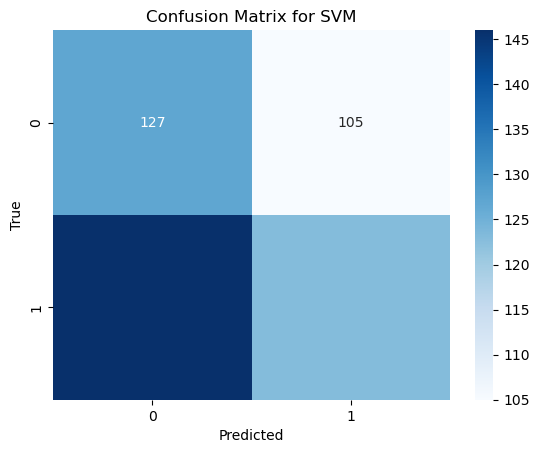

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.47      0.55      0.50       232
           1       0.54      0.46      0.49       269

    accuracy                           0.50       501
   macro avg       0.50      0.50      0.50       501
weighted avg       0.51      0.50      0.50       501

Training Decision Tree...
Confusion Matrix for Decision Tree:
[[115 117]
 [123 146]]


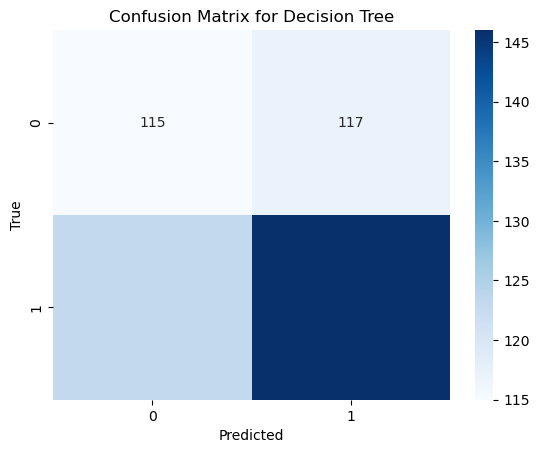

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       232
           1       0.56      0.54      0.55       269

    accuracy                           0.52       501
   macro avg       0.52      0.52      0.52       501
weighted avg       0.52      0.52      0.52       501

Training Random Forest...
Confusion Matrix for Random Forest:
[[112 120]
 [124 145]]


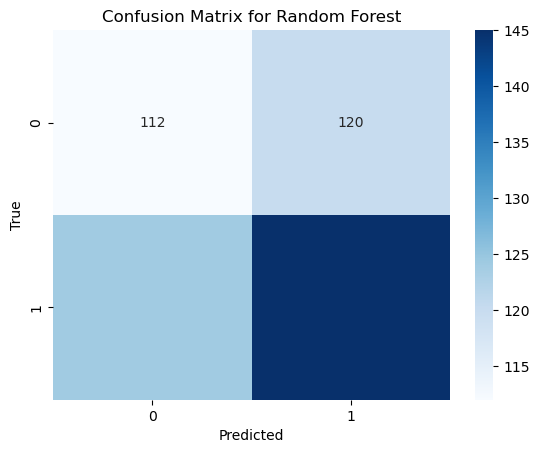

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       232
           1       0.55      0.54      0.54       269

    accuracy                           0.51       501
   macro avg       0.51      0.51      0.51       501
weighted avg       0.51      0.51      0.51       501

Training XGBoost...
Confusion Matrix for XGBoost:
[[118 114]
 [130 139]]


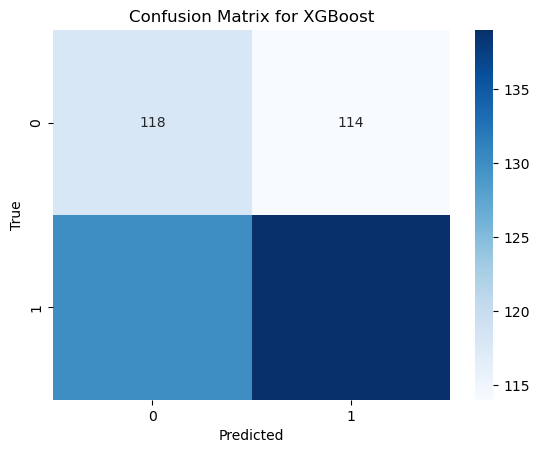

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       232
           1       0.55      0.52      0.53       269

    accuracy                           0.51       501
   macro avg       0.51      0.51      0.51       501
weighted avg       0.52      0.51      0.51       501

Training CatBoost...
Confusion Matrix for CatBoost:
[[111 121]
 [134 135]]


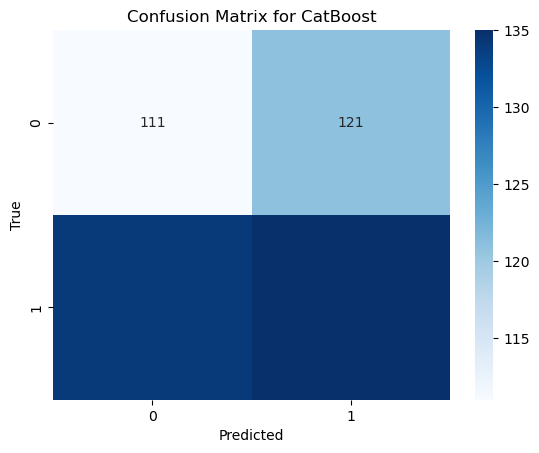

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.45      0.48      0.47       232
           1       0.53      0.50      0.51       269

    accuracy                           0.49       501
   macro avg       0.49      0.49      0.49       501
weighted avg       0.49      0.49      0.49       501



In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 X 是特徵向量，y 是標籤（如股市漲跌的分類）
# 示例數據 (請替換為實際數據)
X = (TW_CONDITION_dropna['score']).values.reshape(-1,1)
y = TW_CONDITION_dropna['TW'].values.reshape(-1,1)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定義模型
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# 訓練和預測
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 生成混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    # 繪製混淆矩陣
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # 打印分類報告
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    

In [27]:
pip install jieba

     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     --------------------------------------- 0.0/19.2 MB 259.2 kB/s eta 0:01:14
     --------------------------------------- 0.0/19.2 MB 217.9 kB/s eta 0:01:29
     --------------------------------------- 0.1/19.2 MB 297.7 kB/s eta 0:01:05
     --------------------------------------- 0.1/19.2 MB 327.3 kB/s eta 0:00:59
     --------------------------------------- 0.1/19.2 MB 435.7 kB/s eta 0:00:44
     --------------------------------------- 0.2/19.2 MB 551.6 kB/s eta 0:00:35
     --------------------------------------- 0.2/19.2 MB 560.2 kB/s eta 0:00:34
     --------------------------------------- 0.2/19.2 MB 602.4 kB/s eta 0:00:32
      -------------------------------------- 0.3/19.2 MB 771.5 kB/s eta 

In [38]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ENGLISH_NEWS = pd.read_pickle('ENGLISH_NEWS')

In [ ]:
news_data_dict = ENGLISH_NEWS
news_df = pd.DataFrame(list(news_data_dict.items()), columns=['date', 'content'])
stock_data = (df>0).astype(int)

In [78]:
news_df = news_df.set_index('date')
news_df.index = pd.to_datetime(news_df.index)
stock_data = (TW['Close'] - TW['Open'] >0).astype(int)
merged_data = pd.concat([news_df, stock_data], axis = 1)
merged_data_dropna = merged_data.dropna()
merged_data_dropna = merged_data_dropna.rename(columns = {0: 'TW'})

新聞數據和股票數據已合併
數據集已分割
Training SVM...
Confusion Matrix for SVM:
[[ 78 169]
 [ 94 163]]


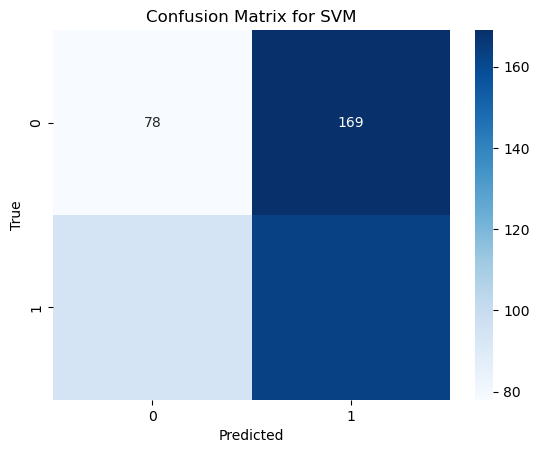

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.45      0.32      0.37       247
         1.0       0.49      0.63      0.55       257

    accuracy                           0.48       504
   macro avg       0.47      0.48      0.46       504
weighted avg       0.47      0.48      0.46       504

Training Decision Tree...
Confusion Matrix for Decision Tree:
[[119 128]
 [120 137]]


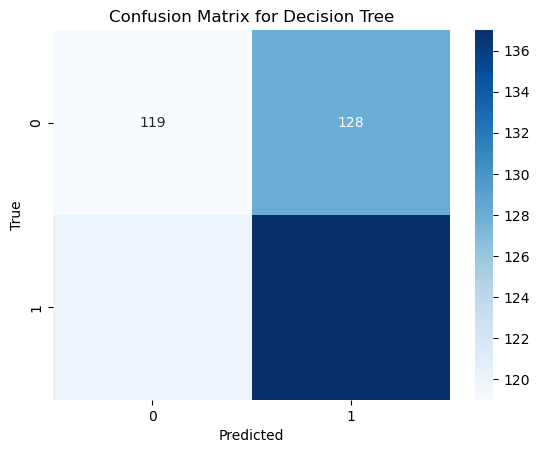

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49       247
         1.0       0.52      0.53      0.52       257

    accuracy                           0.51       504
   macro avg       0.51      0.51      0.51       504
weighted avg       0.51      0.51      0.51       504

Training Random Forest...
Confusion Matrix for Random Forest:
[[108 139]
 [123 134]]


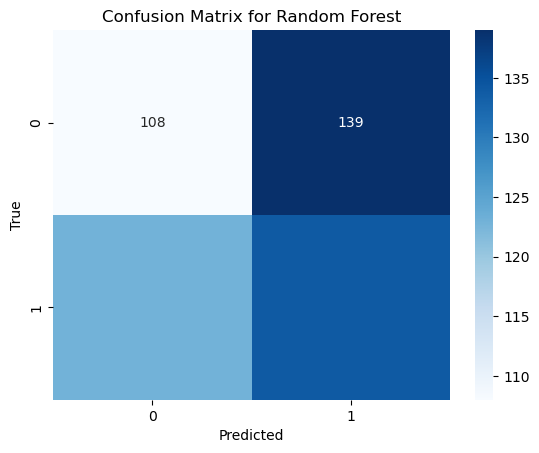

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.47      0.44      0.45       247
         1.0       0.49      0.52      0.51       257

    accuracy                           0.48       504
   macro avg       0.48      0.48      0.48       504
weighted avg       0.48      0.48      0.48       504

Training XGBoost...
Confusion Matrix for XGBoost:
[[120 127]
 [121 136]]


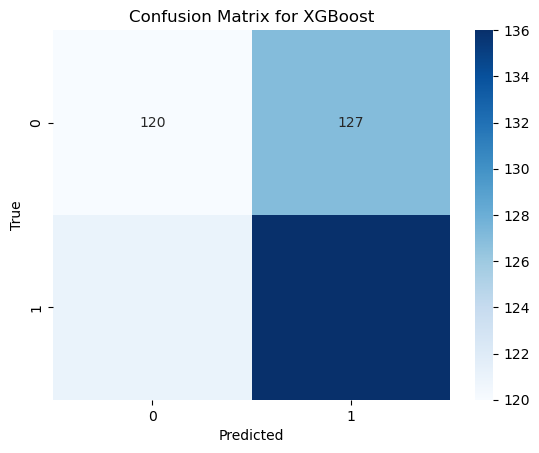

Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.50      0.49      0.49       247
         1.0       0.52      0.53      0.52       257

    accuracy                           0.51       504
   macro avg       0.51      0.51      0.51       504
weighted avg       0.51      0.51      0.51       504

Training CatBoost...
Confusion Matrix for CatBoost:
[[104 143]
 [115 142]]


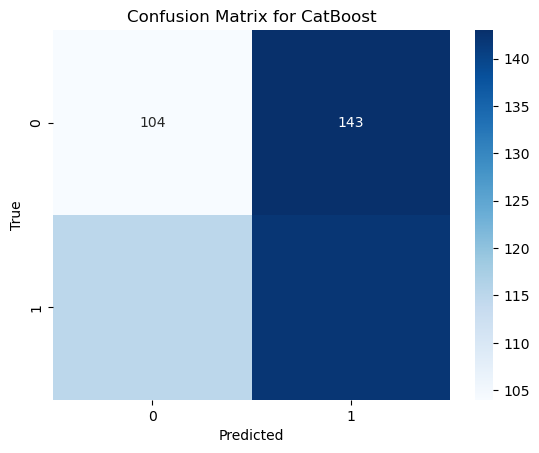

Classification Report for CatBoost:
              precision    recall  f1-score   support

         0.0       0.47      0.42      0.45       247
         1.0       0.50      0.55      0.52       257

    accuracy                           0.49       504
   macro avg       0.49      0.49      0.49       504
weighted avg       0.49      0.49      0.49       504



In [87]:
X = np.vstack(merged_data_dropna['average_vector'].values)
y = merged_data_dropna['TW'].values
print("新聞數據和股票數據已合併")

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("數據集已分割")

models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# 訓練和預測
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 生成混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    # 繪製混淆矩陣
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # 打印分類報告
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    

In [264]:
SENTIMENT_SCORE_DAILY_dic = pd.DataFrame(pd.read_pickle('SENTIMENT_SCORE_DAILY'), index = ['score']).T

In [266]:
SENTIMENT_SCORE_DAILY_dic['ret'] = ((TW['Close'] - TW['Open']) > 0).astype(int)

In [268]:
SENTIMENT_SCORE_DAILY_dic = SENTIMENT_SCORE_DAILY_dic.dropna()

In [269]:
SENTIMENT_SCORE_DAILY_dic

,score,ret
2013-01-02,0.214,1.0
2013-01-03,0.221429,1.0
2013-01-04,0.261111,0.0
2013-01-07,0.22375,0.0
2013-01-08,-0.044286,0.0
...,...,...
2024-01-15,0.35,1.0
2024-01-17,0.0,0.0
2024-01-19,0.27,1.0
2024-01-23,0.62,1.0


In [258]:
from statsmodels.tsa.stattools import grangercausalitytests

In [260]:
TW_CONDITION['score'] = TW_CONDITION['score'].shift(-1)
TW_CONDITION = TW_CONDITION.dropna()

In [261]:
granger_data = TW_CONDITION[['TW', 'score']].dropna() ##順序很重要，這是代表情緒分數能不能預測股市

# 進行Granger因果分析
max_lag = 1 # 最大滯後期
print("\nGranger Causality Tests:")
granger_results = grangercausalitytests(granger_data, max_lag, verbose=True)


Granger Causality Tests:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4529  , p=0.0349  , df_denom=2506, df_num=1
ssr based chi2 test:   chi2=4.4582  , p=0.0347  , df=1
likelihood ratio test: chi2=4.4543  , p=0.0348  , df=1
parameter F test:         F=4.4529  , p=0.0349  , df_denom=2506, df_num=1


/Users/davera0503/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [25]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from sklearn.decomposition import PCA
from transformers import AutoTokenizer, AutoModel
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as cb
from sklearn.metrics import accuracy_score, f1_score

# Ensure you have the necessary NLTK data files
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\施如恩\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\施如恩\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\施如恩\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
#news_data_dict = ENGLISH_NEWS
#news_data = pd.DataFrame(list(news_data_dict.items()), columns=['date', 'headline'])
#stock_data = TW  

## 情緒分析方法二

In [27]:
# Preprocess the news data
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if not word in stop_words]
    return words

# 確保所有新聞標題都是字符串格式
print("確保所有新聞標題都是字符串格式")
news_data['headline'] = news_data['headline'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

print("開始預處理新聞數據")
news_data['processed_text'] = news_data['headline'].apply(preprocess)
print("預處理完成")

# Extract keywords using POS tagging
#def extract_keywords(text):
#    pos_tags = pos_tag(text)
#    keywords = [word for word, pos in pos_tags if pos.startswith('NN')]
#    return keywords

#print("開始提取關鍵詞")
#news_data['keywords'] = news_data['processed_text'].apply(extract_keywords)
#print("關鍵詞提取完成")

# Convert keywords to one-hot vectors
# unique_keywords = set([word for sublist in news_data['keywords'] for word in sublist])
unique_keywords = set([word for sublist in news_data['processed_text'] for word in sublist])
keyword_to_index = {word: i for i, word in enumerate(unique_keywords)}

def keywords_to_one_hot(keywords):
    one_hot_vector = np.zeros(len(unique_keywords))
    for word in keywords:
        if word in keyword_to_index:
            index = keyword_to_index[word]
            one_hot_vector[index] = 1
    return one_hot_vector

#print("開始將關鍵詞轉換為one-hot向量")
news_data['one_hot'] = news_data['processed_text'].apply(keywords_to_one_hot)
print("one-hot向量轉換完成")

# Dimensionality reduction using PCA
print("開始PCA降維")
pca = PCA(n_components=50)
one_hot_matrix = np.stack(news_data['one_hot'].values)
pca_matrix = pca.fit_transform(one_hot_matrix)
news_data['pca_vector'] = list(pca_matrix)
print("PCA降維完成")

# Sentiment analysis using DeBERTa
print("開始情感分析")
tokenizer = AutoTokenizer.from_pretrained('mrm8488/deberta-v3-ft-financial-news-sentiment-analysis')
model = AutoModel.from_pretrained('mrm8488/deberta-v3-ft-financial-news-sentiment-analysis')

def get_deberta_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy().flatten()

news_data['deberta_vector'] = news_data['headline'].apply(get_deberta_embedding)
print("情感分析完成")

# Combine PCA and DeBERTa vectors
print("開始合併PCA和DeBERTa向量")
def combine_vectors(row):
    return np.concatenate((row['pca_vector'], row['deberta_vector']))

news_data['combined_vector'] = news_data.apply(combine_vectors, axis=1)
print("向量合併完成")



確保所有新聞標題都是字符串格式
開始預處理新聞數據
預處理完成
one-hot向量轉換完成
開始PCA降維
PCA降維完成
開始情感分析
情感分析完成
開始合併PCA和DeBERTa向量
向量合併完成


In [11]:
news_data = pd.read_pickle('news_data')

In [12]:
news_data.index = pd.to_datetime(news_data.index)

In [ ]:
headline

In [137]:
news_data['deberta_vector']

date
2013-01-05    [-0.31021786, 0.00637058, 0.13528177, -0.08238...
2013-01-06    [-0.31021786, 0.00637058, 0.13528177, -0.08238...
2013-01-02    [0.20349942, -0.5149798, -0.12905835, -0.90086...
2013-01-10    [-0.4771759, 0.50899684, 0.1829976, -0.4760915...
2013-01-11    [-0.035210736, -0.1938477, 0.48036596, -0.9391...
                                    ...                        
2024-01-23    [-0.37190878, 0.19442037, 0.59594357, -0.92776...
2023-12-27    [-0.2224647, 0.1705586, 0.3067719, -0.73429716...
2024-01-24    [-0.4835017, 0.26668465, 0.3477499, -0.7467269...
2024-01-04    [-0.6258783, 0.73710215, -0.18565762, 0.012914...
2023-11-30    [-0.18687218, -0.21910216, 0.47474724, -1.1393...
Name: deberta_vector, Length: 3163, dtype: object

In [18]:
len(news_data.loc['2013-01-02']['keywords'])

1028

In [19]:
len(news_data.loc['2013-01-02']['processed_text'])

1939

In [29]:
news_data.to_pickle('news_data')

In [36]:
stock_data['trend'] = DF
stock_data = stock_data.dropna()

In [82]:
TW_min = pd.read_excel('20240605005402DataExport.xlsx')
TW_min = TW_min.set_index('Y9999 加權指數--20150101-20240131')
TW_min[TW_min['Unnamed: 1'] == '0900']['Unnamed: 2'] 
df = TW_min[TW_min['Unnamed: 1'] == '1000']['Unnamed: 2'] - TW_min[TW_min['Unnamed: 1'] == '0900']['Unnamed: 2'] 
df.index = pd.to_datetime(df.index)

In [36]:
#news_data = news_data.set_index('date')
news_data.index = pd.to_datetime(news_data.index)
news_data['trend'] = (df > 0).astype(int)
news_data_dropna = news_data.dropna()

In [41]:
sox = yf.download('^SOX')

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

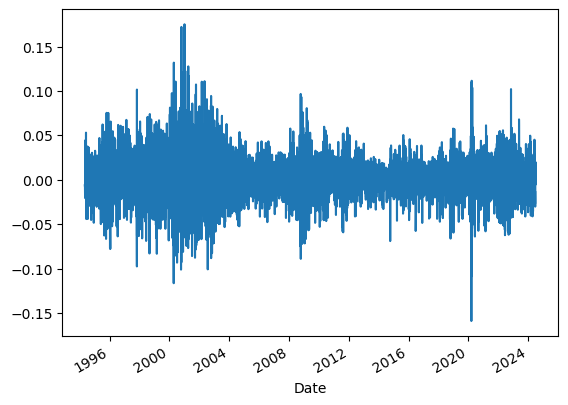

In [129]:
sox['Close'].pct_change().plot()

In [119]:
news_data['sox'] = 0
news_data['sox'] = sox['Close'].pct_change()
news_data['sox'] = news_data['sox'].shift(1)
news_data['sox'] = (news_data['sox'] > 0).astype(int)

In [100]:
N225 = yf.download('^N225', interval="1h", start = '2022-08-01', end = '2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [102]:
news_data

,headline,processed_text,keywords,one_hot,pca_vector,deberta_vector,combined_vector,trend,sox,N225
date,,,,,,,,,,
2013-01-05,,[],[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12.775339872193287, -3.1276242091353135, -1....","[-0.31021786, 0.00637058, 0.13528177, -0.08238...","[-12.775339872193287, -3.1276242091353135, -1....",NaN,0,0
2013-01-06,,[],[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-12.775339872193275, -3.1276242091352273, -1....","[-0.31021786, 0.00637058, 0.13528177, -0.08238...","[-12.775339872193275, -3.1276242091352273, -1....",NaN,0,0
2013-01-02,Juheng Taipei Data Center 2013-01-02 08:51 ◆ M...,"[Juheng, Taipei, Data, Center, Market, Trend, ...","[Juheng, Taipei, Data, Center, Market, Trend, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.315641866878483, 1.2250265451758522, -2.081...","[0.20349942, -0.5149798, -0.12905835, -0.90086...","[5.315641866878483, 1.2250265451758522, -2.081...",NaN,0,0
2013-01-10,Juheng.com reporter Cai Zongxian Taipei 2013-0...,"[reporter, Cai, Zongxian, Taipei, Taiwan, stoc...","[reporter, Cai, Zongxian, Taipei, Taiwan, stoc...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.0784965322371995, 1.1812071863820446, -2.84...","[-0.4771759, 0.50899684, 0.1829976, -0.4760915...","[6.0784965322371995, 1.1812071863820446, -2.84...",NaN,1,0
2013-01-11,Juheng Taipei Data Center 2013-01-11 08:45 ◆ M...,"[Juheng, Taipei, Data, Center, Market, Trend, ...","[Juheng, Taipei, Data, Center, Market, Trend, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.6409609380175585, 1.047325832897276, -3.234...","[-0.035210736, -0.1938477, 0.48036596, -0.9391...","[6.6409609380175585, 1.047325832897276, -3.234...",NaN,1,0
...,...,...,...,...,...,...,...,...,...,...
2024-01-23,Juheng.com reporter Zhang Qinfa Taipei 2024-01...,"[reporter, Zhang, Qinfa, Taipei, The, Taipei, ...","[reporter, Zhang, Qinfa, Taipei, Taipei, stock...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-7.657059326951919, 0.6092846266576861, -0.11...","[-0.37190878, 0.19442037, 0.59594357, -0.92776...","[-7.657059326951919, 0.6092846266576861, -0.11...",1.0,1,0
2023-12-27,Juheng.com reporter Peng Yuwen Taipei 2023-12-...,"[reporter, Peng, Yuwen, Taipei, Taiwan, stocks...","[reporter, Peng, Yuwen, Taipei, Taiwan, stocks...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10.143023026964373, -0.9237071481097996, -0....","[-0.2224647, 0.1705586, 0.3067719, -0.73429716...","[-10.143023026964373, -0.9237071481097996, -0....",1.0,1,0
2024-01-24,Juheng.com reporter Peng Yuwen Taipei 2024-01-...,"[reporter, Peng, Yuwen, Taipei, stocks, genera...","[reporter, Peng, Yuwen, Taipei, stocks, Tuesda...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-9.169532727611156, -0.6086158582301014, -0.1...","[-0.4835017, 0.26668465, 0.3477499, -0.7467269...","[-9.169532727611156, -0.6086158582301014, -0.1...",1.0,1,0


In [108]:
N225_data = ((N225.loc[N225.index.hour == 10]['Close'] - N225.loc[N225.index.hour == 9]['Open']) > 0).astype(int)
N225_data.index = N225_data.index.date

In [ ]:
#N225 = yf.download('^N225', interval="1h", period="2022-01")
N225_data = ((N225.loc[N225.index.hour == 10]['Close'] - N225.loc[N225.index.hour == 9]['Open']) > 0).astype(int)
N225_data.index = N225_data.index.date
news_data['N225'] = 0
news_data['N225'] = N225_data

In [120]:
news_data_dropna = news_data.dropna()

In [121]:
news_data_dropna = news_data_dropna.sort_index()

準備數據進行模型訓練
數據集已分割
Training SVM...
Confusion Matrix for SVM:
[[  0 483]
 [  0 573]]


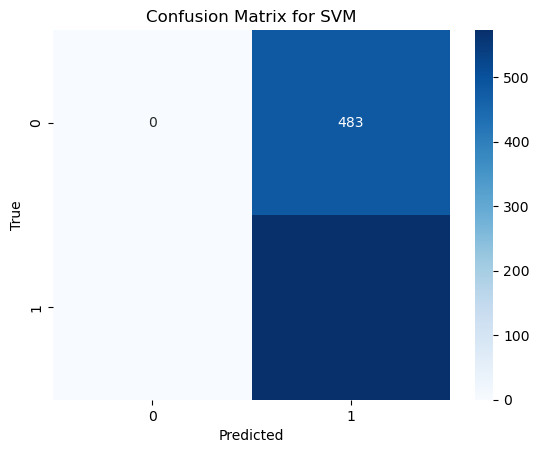

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       483
         1.0       0.54      1.00      0.70       573

    accuracy                           0.54      1056
   macro avg       0.27      0.50      0.35      1056
weighted avg       0.29      0.54      0.38      1056

Training Decision Tree...
Confusion Matrix for Decision Tree:
[[  0 483]
 [  0 573]]


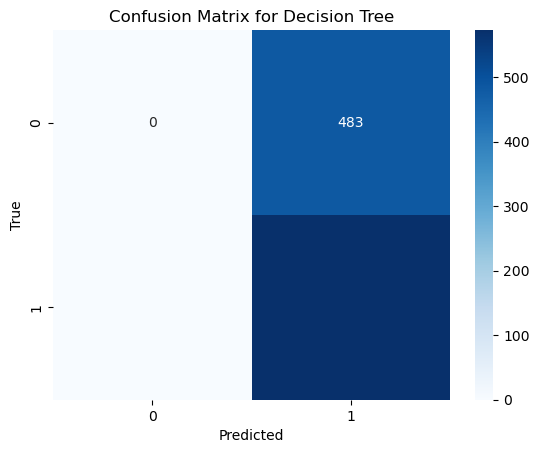

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       483
         1.0       0.54      1.00      0.70       573

    accuracy                           0.54      1056
   macro avg       0.27      0.50      0.35      1056
weighted avg       0.29      0.54      0.38      1056

Training Random Forest...
Confusion Matrix for Random Forest:
[[  0 483]
 [  0 573]]


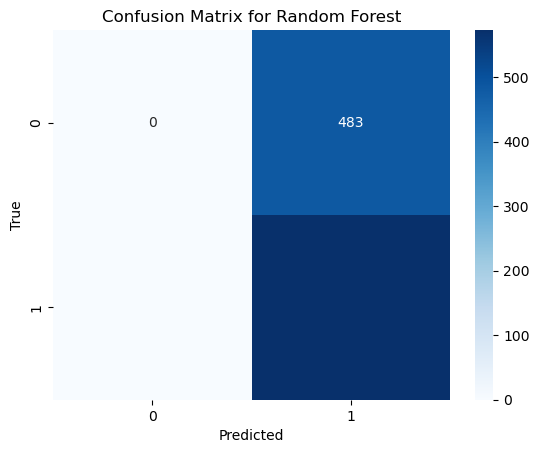

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       483
         1.0       0.54      1.00      0.70       573

    accuracy                           0.54      1056
   macro avg       0.27      0.50      0.35      1056
weighted avg       0.29      0.54      0.38      1056

Training XGBoost...
Confusion Matrix for XGBoost:
[[  0 483]
 [  0 573]]


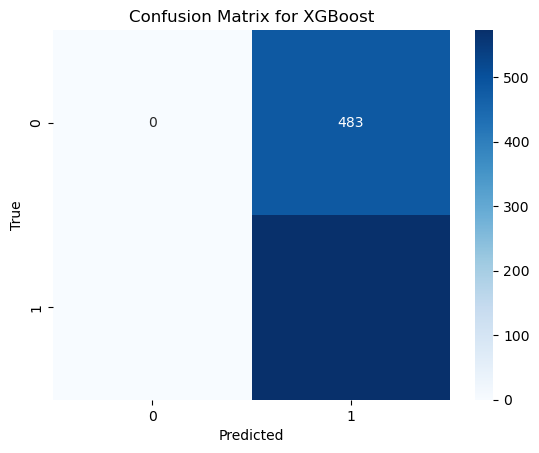

Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       483
         1.0       0.54      1.00      0.70       573

    accuracy                           0.54      1056
   macro avg       0.27      0.50      0.35      1056
weighted avg       0.29      0.54      0.38      1056

Training CatBoost...
Confusion Matrix for CatBoost:
[[  0 483]
 [  0 573]]


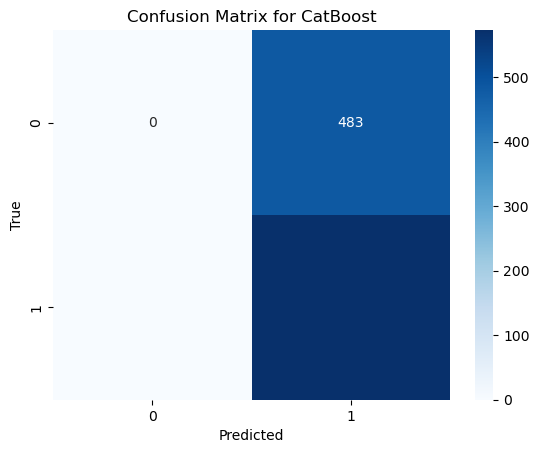

Classification Report for CatBoost:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       483
         1.0       0.54      1.00      0.70       573

    accuracy                           0.54      1056
   macro avg       0.27      0.50      0.35      1056
weighted avg       0.29      0.54      0.38      1056

模型訓練和評估結果:
{}


In [123]:
# Prepare data for model training
print("準備數據進行模型訓練")
#combined_vectors = np.stack(news_data_dropna['combined_vector'].values)
#sox_values = news_data_dropna['sox'].values.reshape(-1, 1)
#n225_values = news_data_dropna['N225'].values.reshape(-1, 1)
#X = np.hstack((combined_vectors, sox_values, n225_values))
X = news_data_dropna['sox'].values.reshape(-1, 1)
y = news_data_dropna['trend']  # Assuming 'trend' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("數據集已分割")
# Train and evaluate models
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'CatBoost': cb.CatBoostClassifier(verbose=0)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 生成混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    # 繪製混淆矩陣
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # 打印分類報告
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
print("模型訓練和評估結果:")
print(results)


## 文本分析方法一

In [ ]:
# 下載停用詞
nltk.download('stopwords')
nltk.download('punkt')

# 停用詞列表
stop_words = set(stopwords.words('english'))


# 預處理文本
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    return words

# 將列表中的新聞內容合併成一個字符串
news_df['content'] = news_df['content'].apply(lambda x: ' '.join(x))

# 預處理新聞內容
news_df['content'] = news_df['content'].apply(preprocess_text)
print("文本已預處理")

# 訓練 Word2Vec 模型
sentences = news_df['content'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec 模型已訓練完成")

# 計算每篇文章的平均向量
def compute_average_vector(words, model):
    vector = np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
    return vector

news_df['average_vector'] = news_df['content'].apply(lambda x: compute_average_vector(x, word2vec_model))
print("每篇文章的平均向量已計算完成")



## 文本分析 方法二

In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# 訓練 LDA 模型
dictionary = Dictionary(news_df['content'])
corpus = [dictionary.doc2bow(text) for text in news_df['content']]
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
print("LDA 模型已訓練完成")

# 獲取 LDA 特徵
def get_lda_features(text, dictionary, lda_model):
    bow = dictionary.doc2bow(text)
    return [prob for _, prob in lda_model.get_document_topics(bow, minimum_probability=0)]

news_df['lda_features'] = news_df['content'].apply(lambda x: get_lda_features(x, dictionary, lda_model))

# 訓練 Word2Vec 模型
sentences = news_df['content'].tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec 模型已訓練完成")

# 計算每篇文章的平均向量
def compute_average_vector(words, model):
    vector = np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
    return vector

news_df['word2vec_features'] = news_df['content'].apply(lambda x: compute_average_vector(x, word2vec_model))
print("每篇文章的平均向量已計算完成")

# 特徵合併方法
def combine_features(row, method):
    if method == 'lda_comb':
        row['lda_features'] = row['lda_features'].apply(lambda x: np.array(x))
        row['word2vec_features'] = row['word2vec_features'].apply(lambda x: np.array(x))
        return np.concatenate((row['lda_features'], row['word2vec_features']))
    elif method == 'stsv':
        return row['word2vec_features']
    elif method == 'stsm':
        return row['lda_features']
    elif method == 'mtmv':
        lda_mean = np.mean(row['lda_features'])
        w2v_mean = np.mean(row['word2vec_features'])
        return np.array([lda_mean, w2v_mean])
    else:
        raise ValueError(f"Unknown method: {method}")

LDA 模型已訓練完成
Word2Vec 模型已訓練完成


C:\Users\Public\AnacondaNew\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Public\AnacondaNew\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


每篇文章的平均向量已計算完成


In [8]:

# 特徵合併方法
def combine_features(row, method):
    if method == 'lda_comb':
        return np.concatenate((np.array(row['lda_features']), np.array(row['word2vec_features'])))
    elif method == 'stsv':
        return row['word2vec_features']
    elif method == 'stsm':
        return row['lda_features']
    elif method == 'mtmv':
        lda_mean = np.mean(row['lda_features'])
        w2v_mean = np.mean(row['word2vec_features'])
        return np.array([lda_mean, w2v_mean])
    else:
        raise ValueError(f"Unknown method: {method}")

In [32]:
TW_min = pd.read_excel('20240605005402DataExport.xlsx')
TW_min = TW_min.set_index('Y9999 加權指數--20150101-20240131')
TW_min[TW_min['Unnamed: 1'] == '0900']['Unnamed: 2'] 
df = TW_min[TW_min['Unnamed: 1'] == '1000']['Unnamed: 2'] - TW_min[TW_min['Unnamed: 1'] == '0900']['Unnamed: 2'] 
df.index = pd.to_datetime(df.index)

In [18]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

正在處理方法: lda_comb
新聞數據和股票數據已合併 (方法: lda_comb)
新聞數據和股票數據已合併
數據集已分割
Training SVM...
Confusion Matrix for SVM:
[[  9 171]
 [  9 225]]


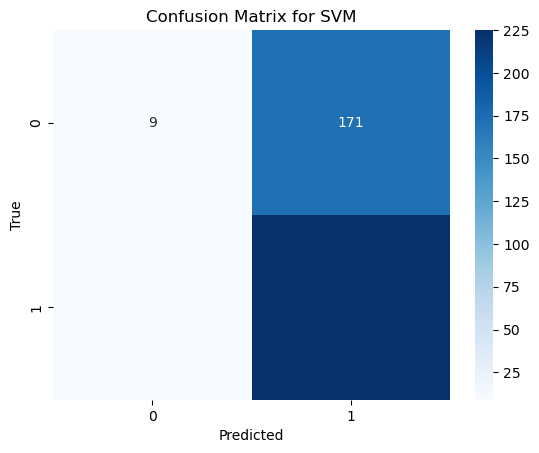

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.50      0.05      0.09       180
         1.0       0.57      0.96      0.71       234

    accuracy                           0.57       414
   macro avg       0.53      0.51      0.40       414
weighted avg       0.54      0.57      0.44       414

Training Decision Tree...
Confusion Matrix for Decision Tree:
[[ 76 104]
 [ 90 144]]


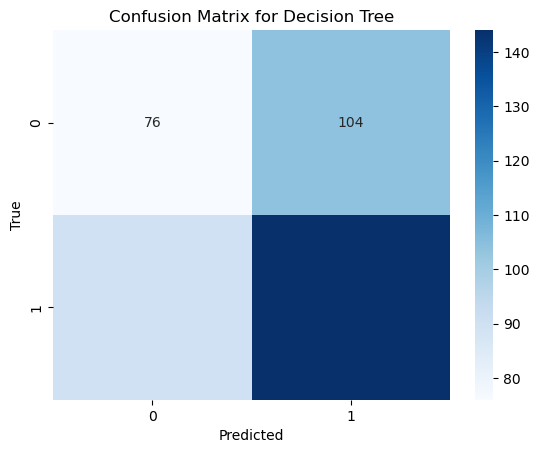

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.46      0.42      0.44       180
         1.0       0.58      0.62      0.60       234

    accuracy                           0.53       414
   macro avg       0.52      0.52      0.52       414
weighted avg       0.53      0.53      0.53       414

Training Random Forest...
Confusion Matrix for Random Forest:
[[ 68 112]
 [ 77 157]]


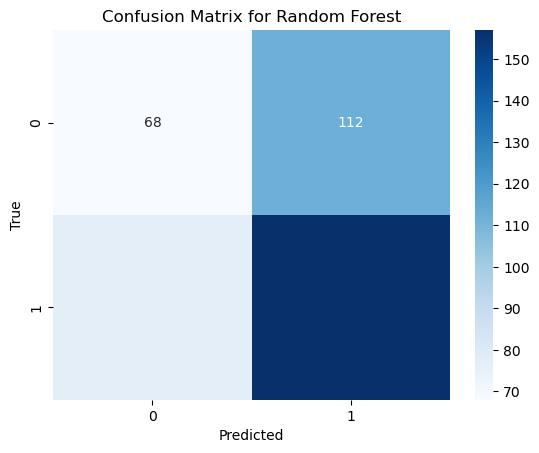

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.47      0.38      0.42       180
         1.0       0.58      0.67      0.62       234

    accuracy                           0.54       414
   macro avg       0.53      0.52      0.52       414
weighted avg       0.53      0.54      0.53       414

Training XGBoost...
Confusion Matrix for XGBoost:
[[ 77 103]
 [ 92 142]]


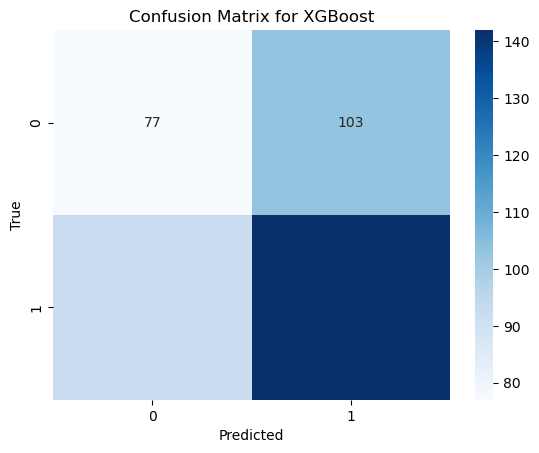

Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.46      0.43      0.44       180
         1.0       0.58      0.61      0.59       234

    accuracy                           0.53       414
   macro avg       0.52      0.52      0.52       414
weighted avg       0.53      0.53      0.53       414

Training CatBoost...
Confusion Matrix for CatBoost:
[[ 72 108]
 [ 64 170]]


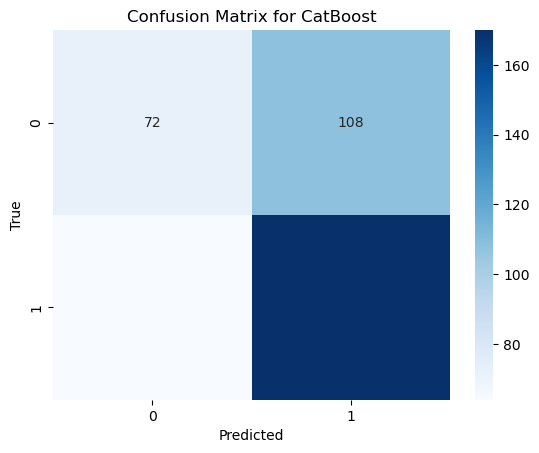

Classification Report for CatBoost:
              precision    recall  f1-score   support

         0.0       0.53      0.40      0.46       180
         1.0       0.61      0.73      0.66       234

    accuracy                           0.58       414
   macro avg       0.57      0.56      0.56       414
weighted avg       0.58      0.58      0.57       414

正在處理方法: stsv
新聞數據和股票數據已合併 (方法: stsv)
新聞數據和股票數據已合併
數據集已分割
Training SVM...
Confusion Matrix for SVM:
[[  9 171]
 [  9 225]]


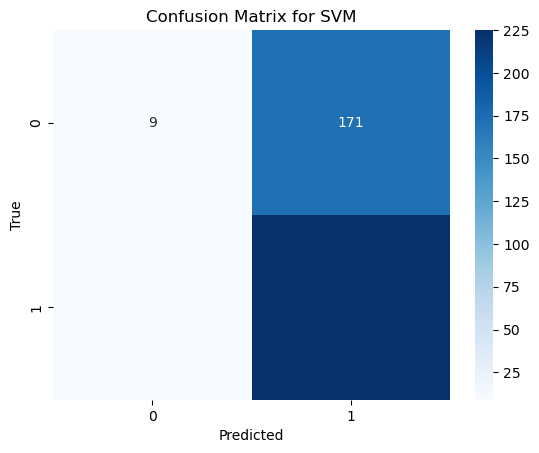

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.50      0.05      0.09       180
         1.0       0.57      0.96      0.71       234

    accuracy                           0.57       414
   macro avg       0.53      0.51      0.40       414
weighted avg       0.54      0.57      0.44       414

Training Decision Tree...
Confusion Matrix for Decision Tree:
[[ 76 104]
 [ 88 146]]


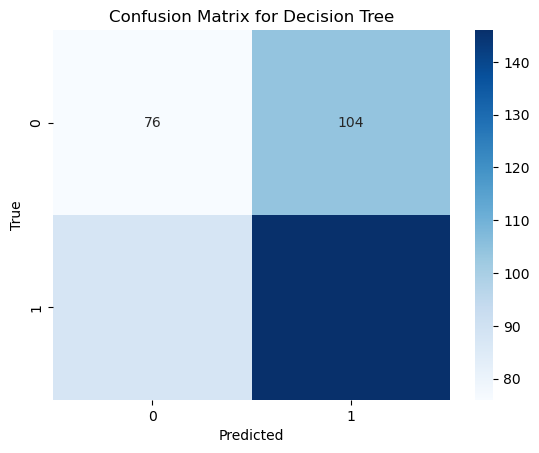

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.46      0.42      0.44       180
         1.0       0.58      0.62      0.60       234

    accuracy                           0.54       414
   macro avg       0.52      0.52      0.52       414
weighted avg       0.53      0.54      0.53       414

Training Random Forest...
Confusion Matrix for Random Forest:
[[ 68 112]
 [ 83 151]]


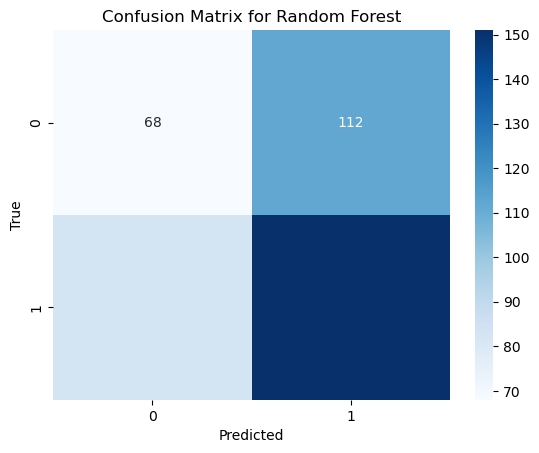

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.45      0.38      0.41       180
         1.0       0.57      0.65      0.61       234

    accuracy                           0.53       414
   macro avg       0.51      0.51      0.51       414
weighted avg       0.52      0.53      0.52       414

Training XGBoost...
Confusion Matrix for XGBoost:
[[ 77 103]
 [ 92 142]]


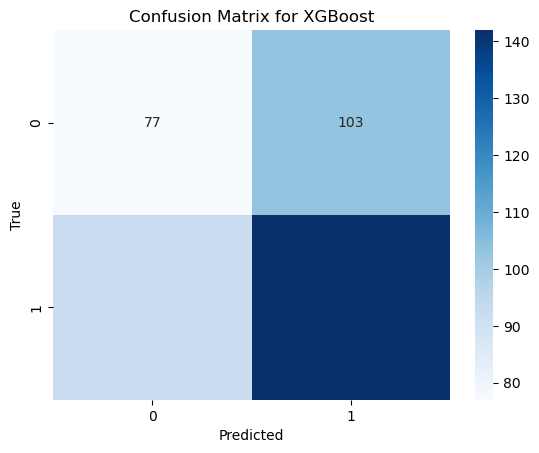

Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.46      0.43      0.44       180
         1.0       0.58      0.61      0.59       234

    accuracy                           0.53       414
   macro avg       0.52      0.52      0.52       414
weighted avg       0.53      0.53      0.53       414

Training CatBoost...
Confusion Matrix for CatBoost:
[[ 72 108]
 [ 64 170]]


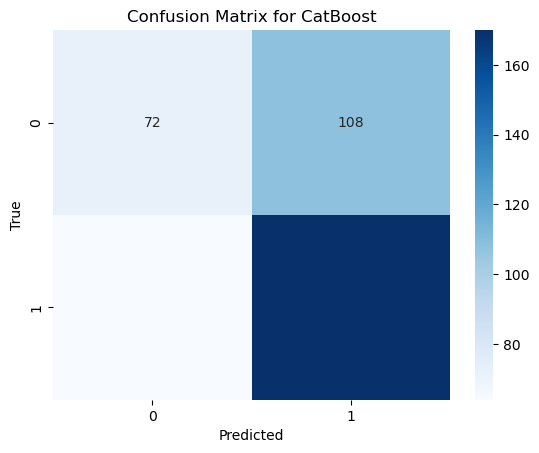

Classification Report for CatBoost:
              precision    recall  f1-score   support

         0.0       0.53      0.40      0.46       180
         1.0       0.61      0.73      0.66       234

    accuracy                           0.58       414
   macro avg       0.57      0.56      0.56       414
weighted avg       0.58      0.58      0.57       414

正在處理方法: stsm
新聞數據和股票數據已合併 (方法: stsm)
新聞數據和股票數據已合併
數據集已分割
Training SVM...
Confusion Matrix for SVM:
[[  9 171]
 [  9 225]]


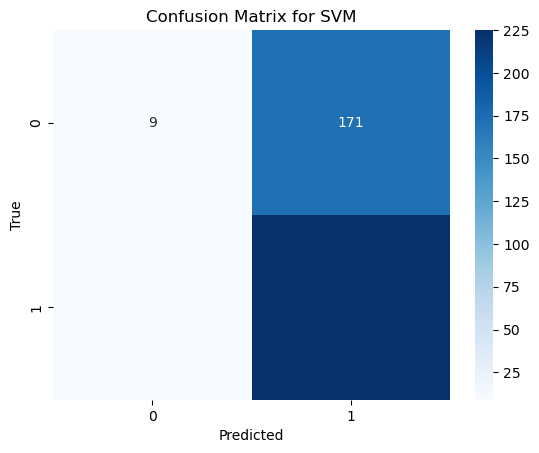

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.50      0.05      0.09       180
         1.0       0.57      0.96      0.71       234

    accuracy                           0.57       414
   macro avg       0.53      0.51      0.40       414
weighted avg       0.54      0.57      0.44       414

Training Decision Tree...
Confusion Matrix for Decision Tree:
[[ 82  98]
 [104 130]]


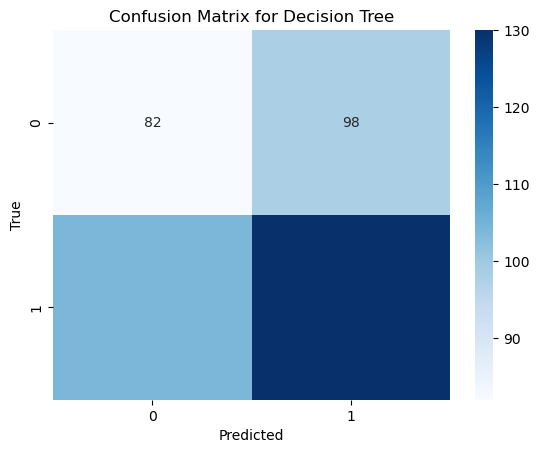

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.44      0.46      0.45       180
         1.0       0.57      0.56      0.56       234

    accuracy                           0.51       414
   macro avg       0.51      0.51      0.51       414
weighted avg       0.51      0.51      0.51       414

Training Random Forest...
Confusion Matrix for Random Forest:
[[ 72 108]
 [ 77 157]]


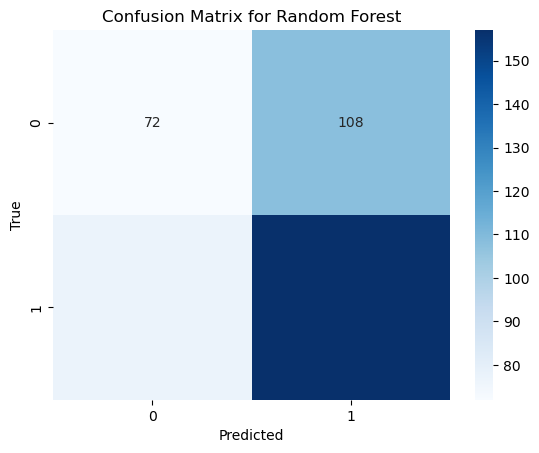

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.48      0.40      0.44       180
         1.0       0.59      0.67      0.63       234

    accuracy                           0.55       414
   macro avg       0.54      0.54      0.53       414
weighted avg       0.54      0.55      0.55       414

Training XGBoost...
Confusion Matrix for XGBoost:
[[ 77 103]
 [ 92 142]]


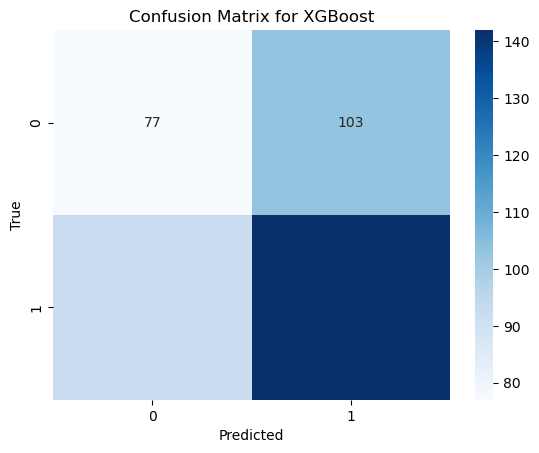

Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.46      0.43      0.44       180
         1.0       0.58      0.61      0.59       234

    accuracy                           0.53       414
   macro avg       0.52      0.52      0.52       414
weighted avg       0.53      0.53      0.53       414

Training CatBoost...
Confusion Matrix for CatBoost:
[[ 72 108]
 [ 64 170]]


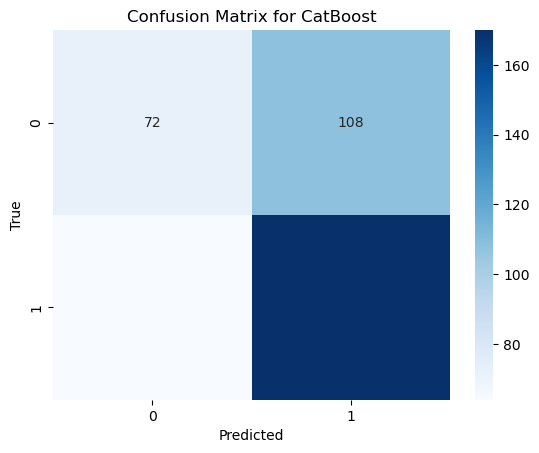

Classification Report for CatBoost:
              precision    recall  f1-score   support

         0.0       0.53      0.40      0.46       180
         1.0       0.61      0.73      0.66       234

    accuracy                           0.58       414
   macro avg       0.57      0.56      0.56       414
weighted avg       0.58      0.58      0.57       414

正在處理方法: mtmv
新聞數據和股票數據已合併 (方法: mtmv)
新聞數據和股票數據已合併
數據集已分割
Training SVM...
Confusion Matrix for SVM:
[[  9 171]
 [  9 225]]


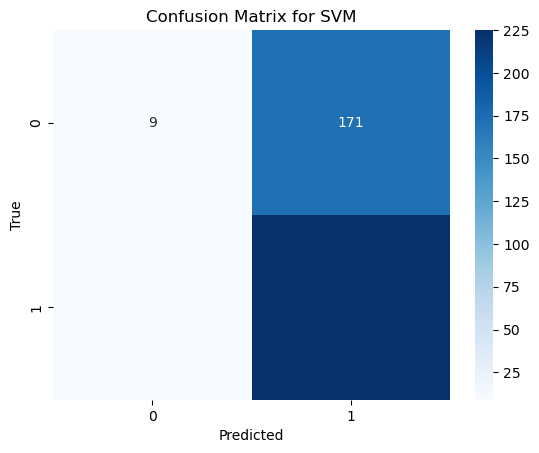

Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.50      0.05      0.09       180
         1.0       0.57      0.96      0.71       234

    accuracy                           0.57       414
   macro avg       0.53      0.51      0.40       414
weighted avg       0.54      0.57      0.44       414

Training Decision Tree...
Confusion Matrix for Decision Tree:
[[ 81  99]
 [ 98 136]]


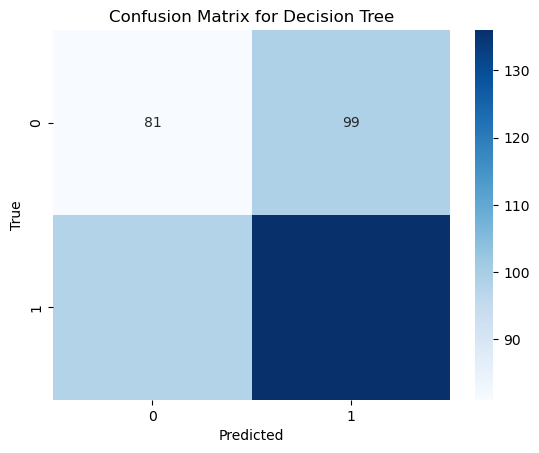

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.45      0.45      0.45       180
         1.0       0.58      0.58      0.58       234

    accuracy                           0.52       414
   macro avg       0.52      0.52      0.52       414
weighted avg       0.52      0.52      0.52       414

Training Random Forest...
Confusion Matrix for Random Forest:
[[ 69 111]
 [ 73 161]]


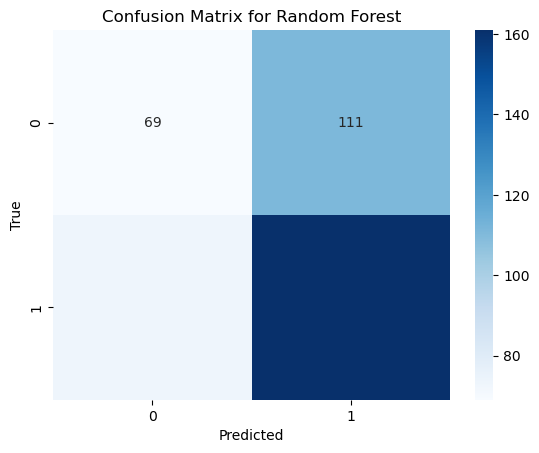

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.49      0.38      0.43       180
         1.0       0.59      0.69      0.64       234

    accuracy                           0.56       414
   macro avg       0.54      0.54      0.53       414
weighted avg       0.55      0.56      0.55       414

Training XGBoost...
Confusion Matrix for XGBoost:
[[ 77 103]
 [ 92 142]]


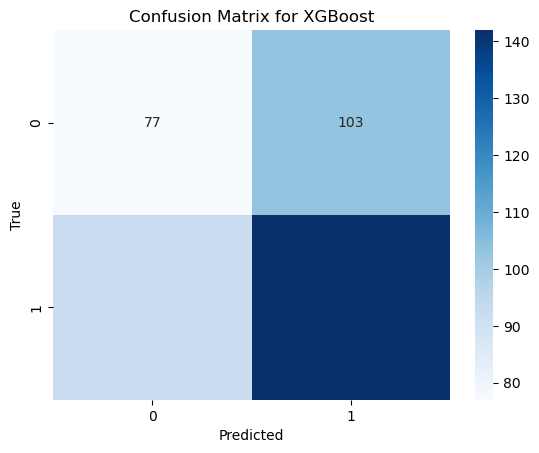

Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.46      0.43      0.44       180
         1.0       0.58      0.61      0.59       234

    accuracy                           0.53       414
   macro avg       0.52      0.52      0.52       414
weighted avg       0.53      0.53      0.53       414

Training CatBoost...
Confusion Matrix for CatBoost:
[[ 72 108]
 [ 64 170]]


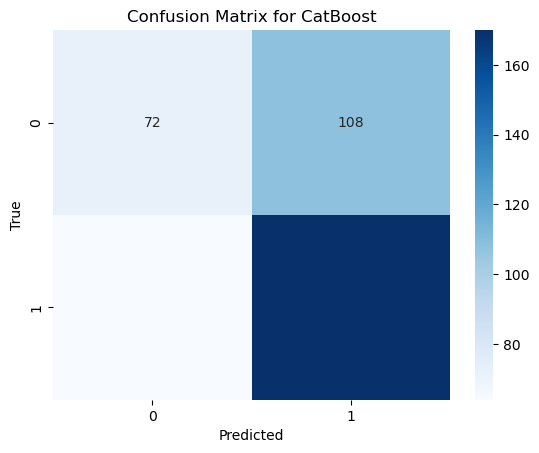

Classification Report for CatBoost:
              precision    recall  f1-score   support

         0.0       0.53      0.40      0.46       180
         1.0       0.61      0.73      0.66       234

    accuracy                           0.58       414
   macro avg       0.57      0.56      0.56       414
weighted avg       0.58      0.58      0.57       414



In [19]:
# 所有合併方法
methods = ['lda_comb', 'stsv', 'stsm', 'mtmv']

results = {}
news_df = news_df.dropna()
#news_df = news_df.set_index('date')
news_df.index = pd.to_datetime(news_df.index)
for method in methods:
    print(f"正在處理方法: {method}")
    news_df['combined_features'] = news_df.apply(lambda row: combine_features(row, method=method), axis=1)
    stock_data = (df >0).astype(int)
    merged_data = pd.concat([news_df, stock_data], axis = 1)
    merged_data_dropna = merged_data.dropna()
    merged_data_dropna = merged_data_dropna.rename(columns = {'Unnamed: 2': 'TW'})
    X = np.vstack(merged_data_dropna['combined_features'].values)
    y = merged_data_dropna['TW'].values
    print(f"新聞數據和股票數據已合併 (方法: {method})")

    X = np.vstack(merged_data_dropna['average_vector'].values)
    y = merged_data_dropna['TW'].values
    print("新聞數據和股票數據已合併")
    
    # 分割數據集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("數據集已分割")
    
    models = {
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": xgb.XGBClassifier(),
        "CatBoost": CatBoostClassifier(verbose=0)
    }
    
    # 訓練和預測
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # 生成混淆矩陣
        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix for {name}:")
        print(cm)
        
        # 繪製混淆矩陣
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix for {name}")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
        # 打印分類報告
        print(f"Classification Report for {name}:")
        print(classification_report(y_test, y_pred))
        